# Pollution and mental performance in BCN

## Inicialitation

In [51]:
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [52]:
import pandas as pd

df = pd.read_csv('CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')

## Initial Exploratory Data Analysis

In [53]:
print(f"The dimensions are: {df.shape[0]} entries and {df.shape[1]} variables")
print(f"List of variables: {list(df.columns)}")

The dimensions are: 3348 entries and 95 variables
List of variables: ['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour', 'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia', 'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador', 'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control', 'z_performance', 'z_mean_incongruent', 'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg', 'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day', 'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary', 'precip_24h_binary', 'maxwindspee

We code some variables as categorical, eliminating some as they are not relevant or contain repeated information in others.
We will later assess whether, by studying the correlations, it is necessary to remove more variables.

In [54]:
list_to_cat = ['ID_Zenodo', 'year', 'month', 'day', 'dayoftheweek', 'hour',
               'mentalhealth_survey', 'bienestar', 'energia', 'estres', 'sueno', 
               'occurrence_stroop', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in list_to_cat:
    df[name] = df[name].astype('category')

In [55]:
eliminations = ['date_all', 'mean_incongruent', 'correct', 'response_duration_ms',
                'mean_congruent', 'horasfuera', 'z_performance', 'inhib_control', 'z_mean_incongruent',
                'z_inhib_control', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
                'no2gps_24h_x30', 'min_gps', 'hour_gps', 'sec_noise55_day', 'sec_noise65_day',
                'sec_greenblue_day', 'Houron', 'Houroff', 'start_day', 'start_month', 'start_year',
                'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime', 
                'Totaltime_estimated', 'mentalhealth_survey', 'stroop_test', 'occurrence_stroop',
                'yearbirth', 'year', 'month', 'day', 'hour', 'µgm3']
df = df.drop(eliminations, axis=1)

We plot numeric and categorical variables individually

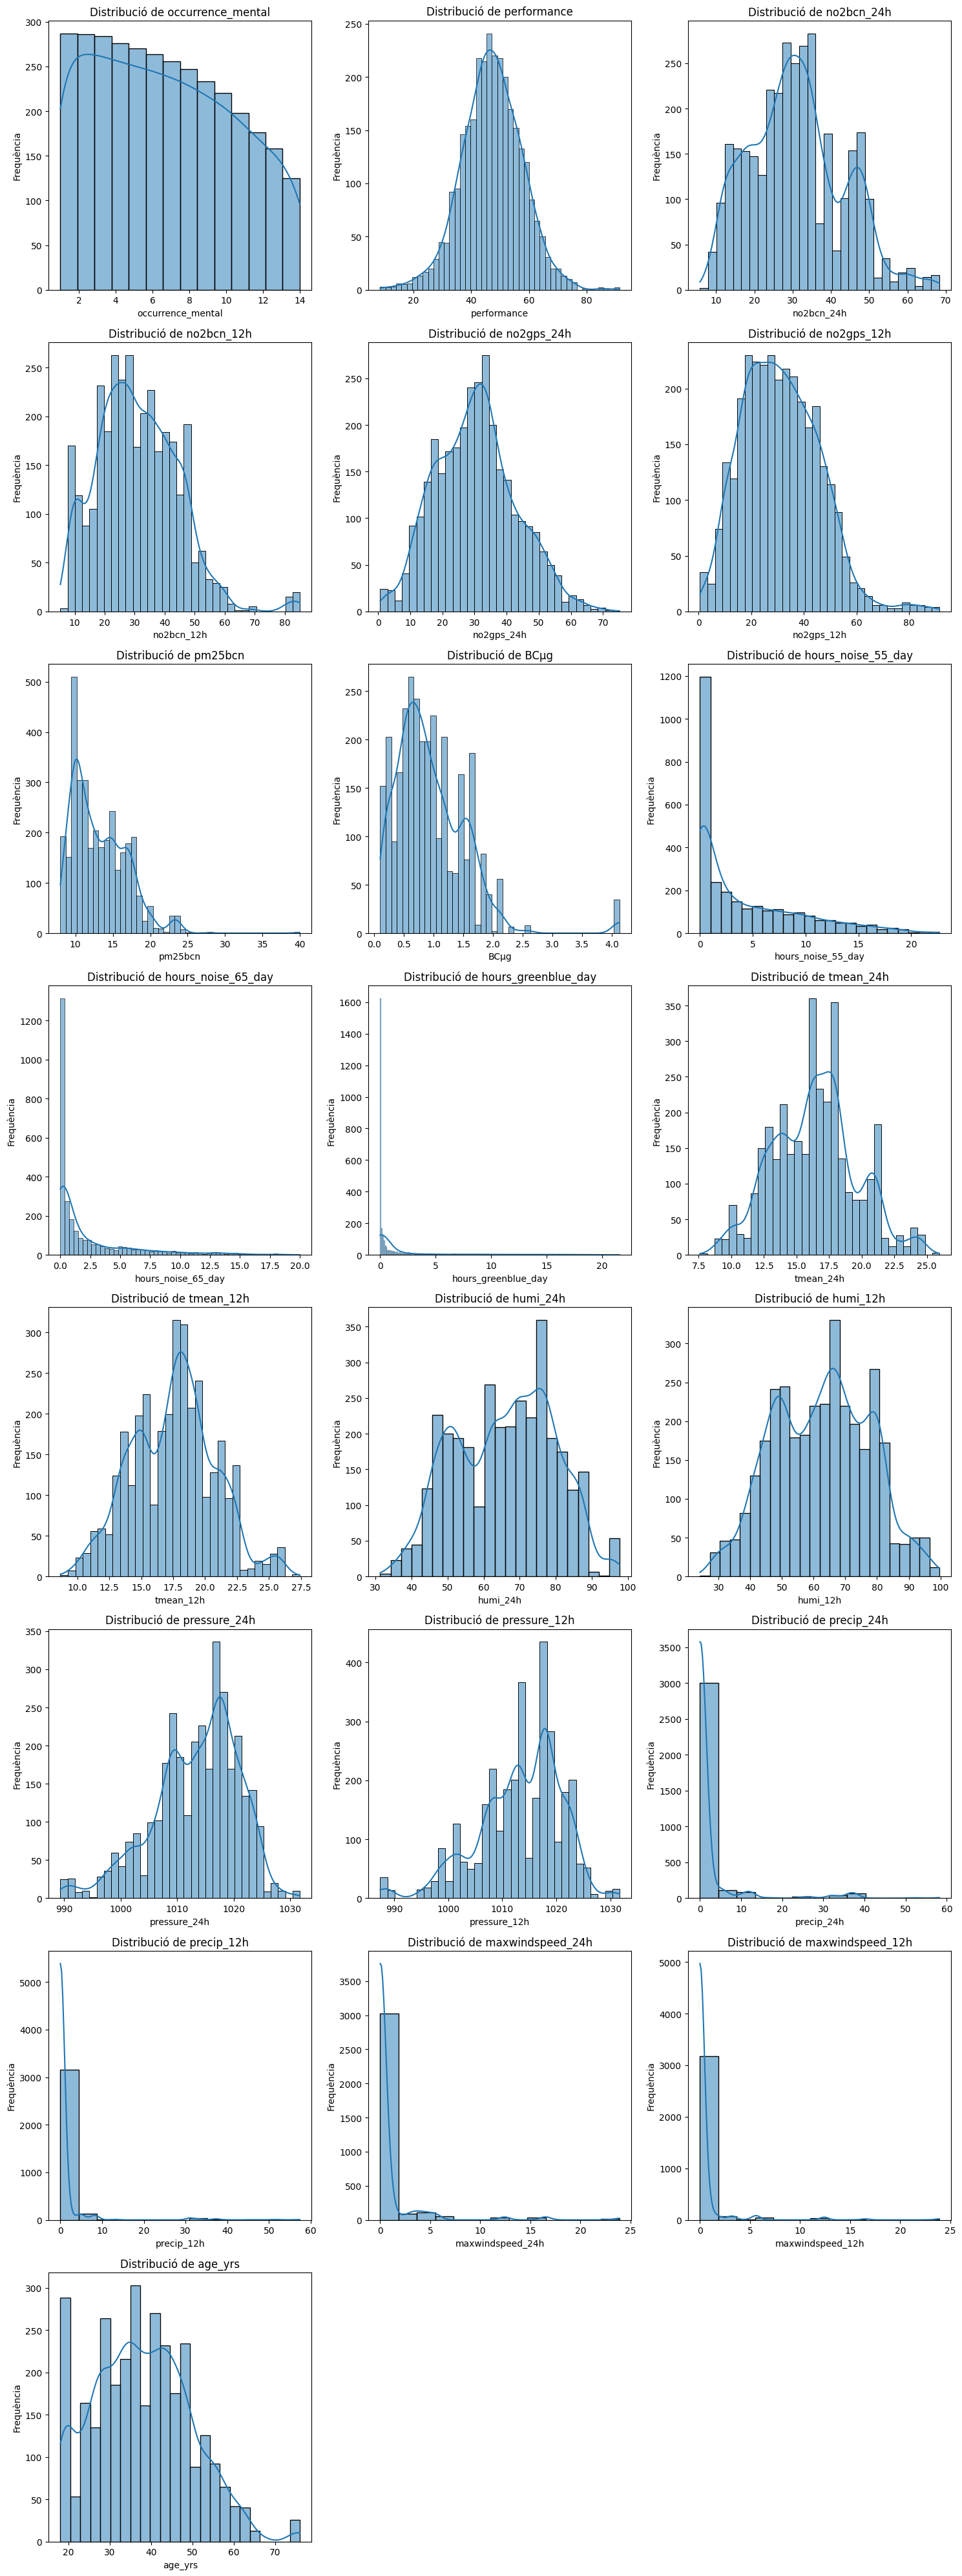

In [56]:
# Distributions of numerical variables
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


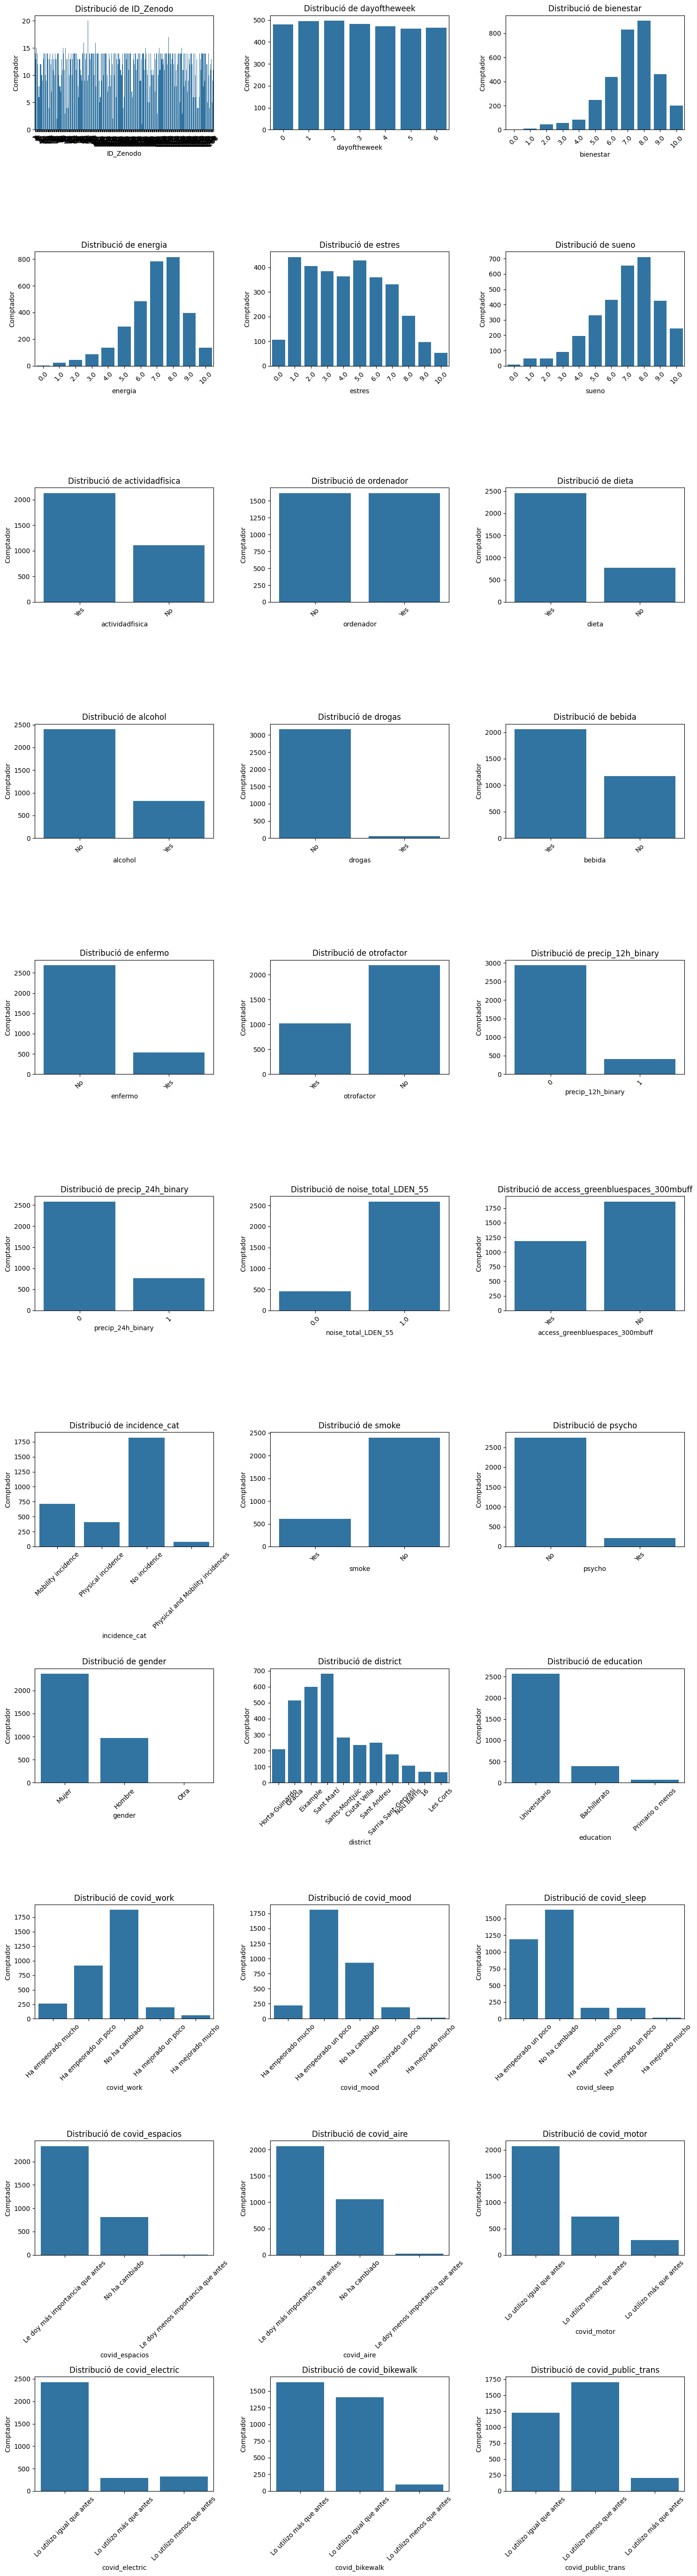

In [57]:
# Barplots for categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=df, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

## Correlation analysis

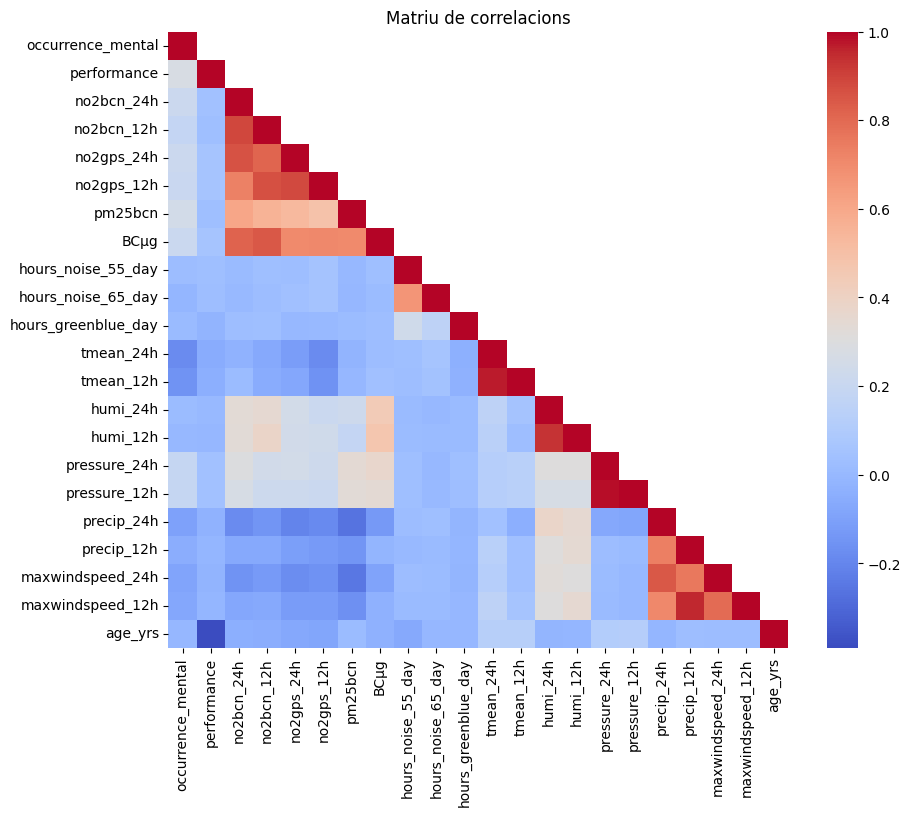

In [58]:
# Creem un nou DataFrame només amb les variables numèriques
df_numeric = df.select_dtypes(include=[np.number])

# Calculem la matriu de correlació
corr = df_numeric.corr()

# Creem una màscara per a la part superior del triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plotejem la matriu de correlació
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title('Matriu de correlacions')
plt.show()

<Axes: xlabel='age_yrs', ylabel='performance'>

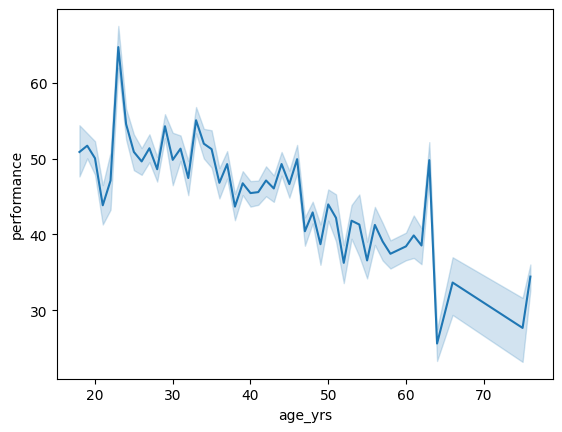

In [59]:
sns.lineplot(data=df, x='age_yrs', y='performance')

### ANOVA

In [60]:
# ANOVA z_performance i education

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('performance ~ education', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
education,866.62761,2.0,4.020372,0.018052
Residual,296070.35133,2747.0,NaN,NaN


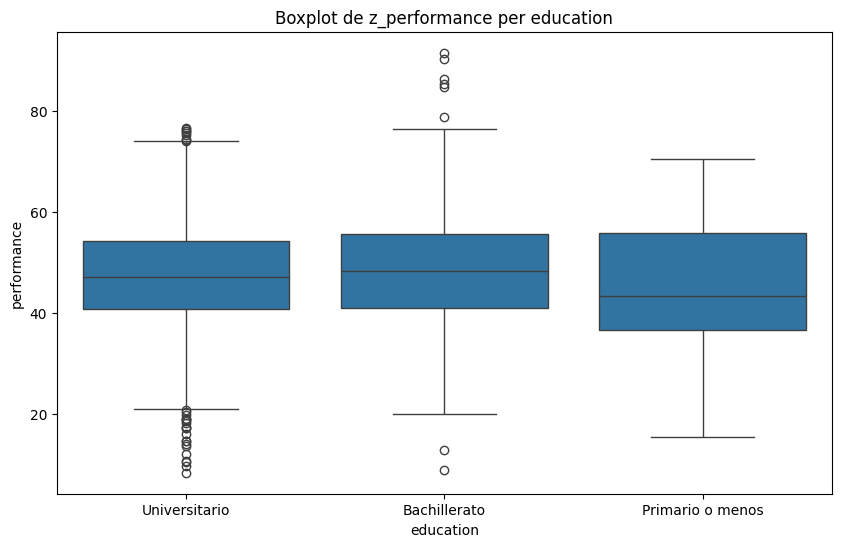

In [61]:
# boxplots del ANOVA anterior

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='education', y='performance')
plt.title('Boxplot de z_performance per education')
plt.show()


ANOVA de z_performance respecte totes les variables categoriques

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assume that cat_vars is a list of your categorical variables
cat_vars = df.select_dtypes(include=['object', 'category']).columns


# Perform ANOVA for each categorical variable
for var in cat_vars:
    if var != 'ID_zenodo':  # Exclude 'ID_zenodo'
        # Construct the formula
        formula = 'performance ~ ' + var

        # Fit the model
        model = ols(formula, data=df).fit()

        # Calculate the ANOVA table
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Print the ANOVA table
        print(f"ANOVA table for variable '{var}':")
        print(anova_table)
        print("\n")

ANOVA table for variable 'ID_Zenodo':
                  sum_sq      df          F  PR(>F)
ID_Zenodo  209136.204537   287.0  16.773447     0.0
Residual   119817.231110  2758.0        NaN     NaN


ANOVA table for variable 'dayoftheweek':
                     sum_sq      df         F    PR(>F)
dayoftheweek    1009.134901     6.0  1.558578  0.155174
Residual      327944.300746  3039.0       NaN       NaN


ANOVA table for variable 'bienestar':
                  sum_sq      df         F    PR(>F)
bienestar    2116.212784    10.0  1.965821  0.033062
Residual   318644.895707  2960.0       NaN       NaN


ANOVA table for variable 'energia':
                 sum_sq      df         F    PR(>F)
energia      790.372918    10.0  0.736655  0.690369
Residual  310718.134742  2896.0       NaN       NaN


ANOVA table for variable 'estres':
                 sum_sq      df         F        PR(>F)
estres      6815.227461    10.0  6.484368  5.738416e-10
Residual  301118.430064  2865.0       NaN           N

## Outlier detection

In [63]:
no_na_df = df.dropna()

In [64]:
from sklearn.decomposition import PCA

num_cols = no_na_df.select_dtypes(include='number').columns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(no_na_df[num_cols])
no_na_df['PCA Component 1'] = pca_features[:, 0]
no_na_df['PCA Component 2'] = pca_features[:, 1]


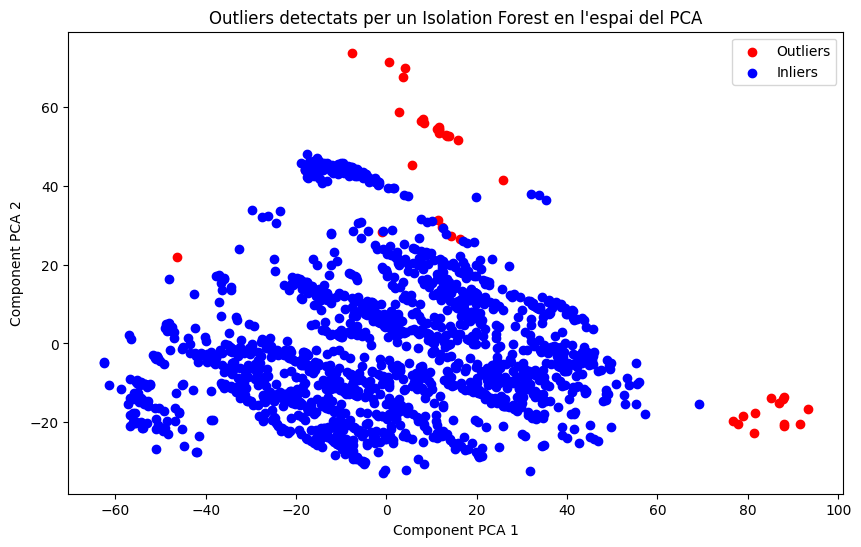

In [65]:
from sklearn.ensemble import IsolationForest

num_cols = no_na_df.select_dtypes(include='number').columns

#Isolation Forest per detectar outliers
isolation_forest = IsolationForest(contamination=0.025, random_state=42)
outlier_labels = isolation_forest.fit_predict(no_na_df[num_cols])
no_na_df['Outlier'] = outlier_labels

#Visualitzem al mateidf PCA
plt.figure(figsize=(10, 6))
plt.scatter(no_na_df[no_na_df['Outlier'] == -1]['PCA Component 1'],
            no_na_df[no_na_df['Outlier'] == -1]['PCA Component 2'],
            color='red', label='Outliers')
plt.scatter(no_na_df[no_na_df['Outlier'] == 1]['PCA Component 1'],
            no_na_df[no_na_df['Outlier'] == 1]['PCA Component 2'],
            color='blue', label='Inliers')
plt.xlabel('Component PCA 1')
plt.ylabel('Component PCA 2')
plt.title("Outliers detectats per un Isolation Forest en l'espai del PCA")
plt.legend()
plt.show()

In [66]:
import plotly.express as px
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(pca_features, x=0, y=1, color=None, color_discrete_sequence=['rgba(147,112,219,0.0)'])

for i, feature in enumerate(num_cols[:-2]):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

## Analysis of missing values

Visualitzem els missing values per variable

,missing_values
occurrence_mental,68
bienestar,75
energia,141
estres,175
sueno,158
actividadfisica,116
ordenador,121
dieta,122
alcohol,126
drogas,121


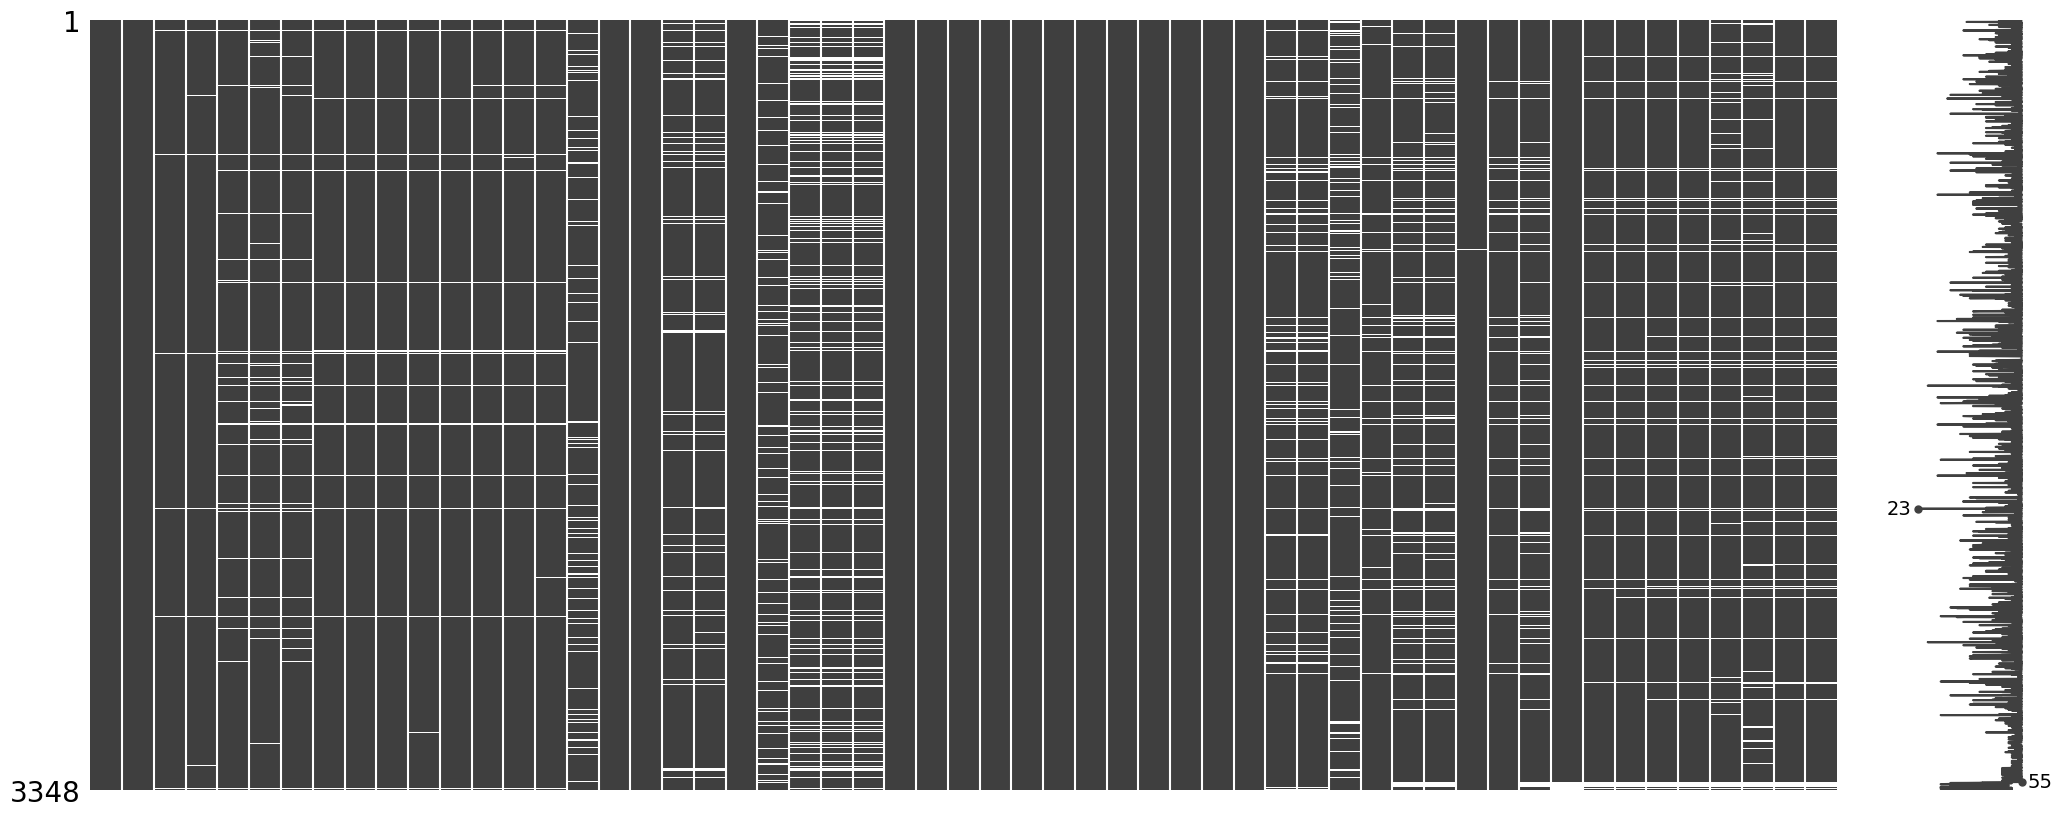

In [67]:
import missingno as msno
msno.matrix(df)

missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

In [68]:
df.shape

(3348, 55)

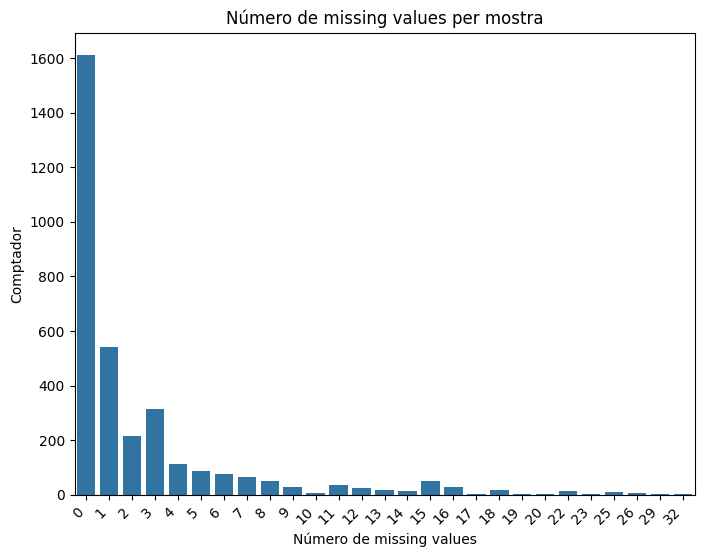

In [69]:
# Barplot amb el numero de missing values per fila 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.isnull().sum(axis=1))
plt.title(f'Número de missing values per mostra')
plt.xlabel('Número de missing values')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()


## Preproccesing

We erase the missing values for z_performance (our target variable)

In [70]:
deleted_na_perf = df.dropna(subset="performance")
deleted_na_perf.shape

KeyError: ['z_performance']

We remove the rows with more than 10 missing values

In [ ]:
deleted_na_perf = deleted_na_perf[deleted_na_perf.isnull().sum(axis=1) < 10]

missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,6
ordenador,8
dieta,9
alcohol,12
drogas,8
bebida,9


In [ ]:
deleted_na_perf.shape

(2814, 55)

We remove the variables with more than 280 missing values

In [ ]:
deleted_na_cols = deleted_na_perf.dropna(axis=1, thresh=len(deleted_na_perf)-280)

missing_values1 = deleted_na_cols.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,6
ordenador,8
dieta,9
alcohol,12
drogas,8
bebida,9


## Partició en Train i Test

In [ ]:
from sklearn.model_selection import train_test_split
X = deleted_na_cols[deleted_na_cols.columns.drop("performance")]
y = deleted_na_cols["performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
num_cols = X_train.select_dtypes(include='number').columns
print(X_train[num_cols])

      occurrence_mental  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  \
2042                9.0   16.178571   12.238095   16.953311   17.541355   
2579                1.0   31.720238   23.678571   32.837443   17.471924   
2806               12.0   39.908730   37.948413   37.439314   34.842862   
2973                5.0   20.507937   20.373016   22.340237   22.426568   
1195                9.0   27.184722   32.438889   30.224325   36.406738   
...                 ...         ...         ...         ...         ...   
1922               10.0   29.934722   44.202778   14.969844   20.588058   
1276                5.0   37.334325   50.537698   38.132175   50.784098   
1319                3.0   28.250992   27.799603   36.395694   27.629517   
1513                8.0   27.486111   31.069444   22.078491   27.639730   
1003                5.0   59.315476   56.928571   61.934506   50.337646   

        pm25bcn      BCμg  tmean_24h  tmean_12h   humi_24h   humi_12h  \
2042   8.433333  0.211821 

## Imputation of missing values

Usem un imputador per emplenar la resta de missings

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num_cols = X_train.select_dtypes(include='number').columns

numeric_delna = X_train[num_cols]
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(numeric_delna)

X_train[num_cols] = imp_mean.transform(numeric_delna)
X_test[num_cols] = imp_mean.transform(X_test[num_cols])

Ens queden les categòriques. Emplenem amb KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

class KNNImputer:
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
    def fit(self, X, numeric_cols):
        self.X = X.dropna().copy() # suposem que les numeriques estan imputades
        self.numeric = numeric_cols
        self.vecinos = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X.dropna()[numeric_cols])
    def _get_mode(self, variable, indexs):
        vecinos = [self.X.iloc[[i]].iloc[0] for i in indexs[0]]
        valors = [v.iloc[variable] for v in vecinos]
        unique, counts = np.unique(valors, return_counts = True)
        mode = unique[np.argmax(counts)]
        return mode
    def _impute_row(self, row):
        dist, indexs = self.vecinos.kneighbors([row[self.numeric]])
        for variable, value in enumerate(row.isna()):
            if value:
                mode = self._get_mode(variable, indexs)
                row.iloc[variable] = mode
        return row
    def transform(self, X):
        X_imputed = []
        for ind, row in X.iterrows():
            new_row = self._impute_row(row)
            X_imputed.append(new_row)
        return pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

imputer = KNNImputer()

imputer.fit(X_train, num_cols)

X_train_new = imputer.transform(X_train)
X_test_new = imputer.transform(X_test)

X_train_new.shape

(2251, 51)

## Feature selection, extraction and transformation

### COVID variables

Tractem les variables textuals de COVID

In [ ]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

for column in covid:
    X_train_new[column] = X_train_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')
    X_test_new[column] = X_test_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')

# print categories for covid variables

for col in covid:
    print(f'{col}: {X_train_new[col].unique()}')

covid_work: ['Yes' 'No']
covid_mood: ['Yes' 'No']
covid_sleep: ['Yes' 'No']
covid_espacios: ['No' 'Yes']
covid_aire: ['No' 'Yes']
covid_motor: ['Yes' 'No']
covid_electric: ['Yes' 'No']
covid_bikewalk: ['Yes' 'No']
covid_public_trans: ['Yes' 'No']


In [ ]:
# Creem una nova variable anomenada 'covid_afecta' binaria, on True indica que la persona ha estat afectada per la covid i False en cas contrari.
# Aquesta variable es crea a partir de les variables de la llista 'covid', i fem la moda de les respostes per a cada individu.

for row in X_train_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_train_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_train_new.at[row[0], 'covid_afecta'] = 'No'

for row in X_test_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_test_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_test_new.at[row[0], 'covid_afecta'] = 'No'

# Eliminem les variables de la llista 'covid' ja que ja no les necessitem
X_train_new = X_train_new.drop(covid, axis=1)
X_test_new = X_test_new.drop(covid, axis=1)

print(X_train_new['covid_afecta'].value_counts())

covid_afecta
Yes    1451
No      800
Name: count, dtype: int64


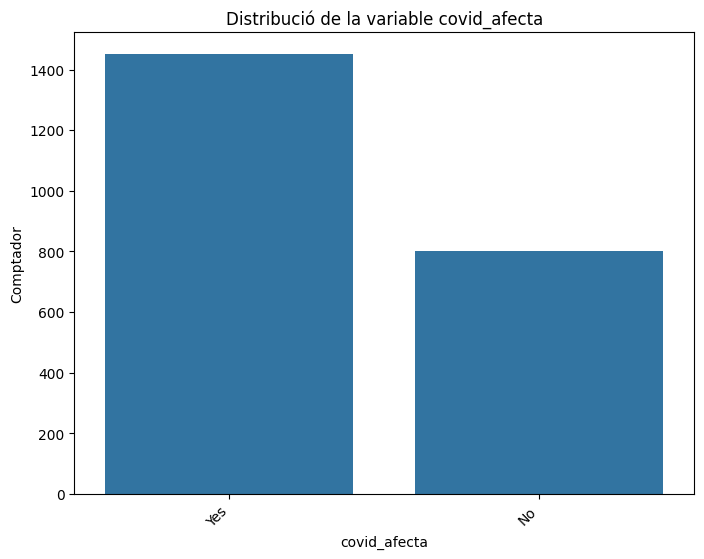

In [ ]:
# Barcplot for covid_afecta
plt.figure(figsize=(8, 6))
sns.countplot(data=X_train_new, x='covid_afecta')
plt.title('Distribució de la variable covid_afecta')
plt.xlabel('covid_afecta')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')
plt.show()


### Meteorological and pollution variables

In [ ]:
X_train_new.columns

Index(['ID_Zenodo', 'dayoftheweek', 'occurrence_mental', 'bienestar',
       'energia', 'estres', 'sueno', 'actividadfisica', 'ordenador', 'dieta',
       'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'no2bcn_24h',
       'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'pm25bcn', 'BCμg',
       'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h',
       'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary',
       'precip_24h_binary', 'maxwindspeed_24h', 'maxwindspeed_12h',
       'noise_total_LDEN_55', 'access_greenbluespaces_300mbuff',
       'incidence_cat', 'age_yrs', 'smoke', 'psycho', 'gender', 'district',
       'education', 'covid_afecta'],
      dtype='object')

In [ ]:
# ...
to_delete = ["no2bcn_24h", "no2bcn_12h", "no2gps_24h", "tmean_24h", "pressure_24h", "precip_24h", "maxwindspeed_24h", "humi_24h", "precip_24h_binary"]
X_train_new = X_train_new.drop(to_delete, axis=1)
X_test_new = X_test_new.drop(to_delete, axis=1)

## Recoding of categorical variables

In [ ]:
to_cat = ['ID_Zenodo', 'precip_12h_binary',
               'noise_total_LDEN_55']

for name in to_cat:
    X_train_new[name] = X_train_new[name].astype('category')
    X_test_new[name] = X_test_new[name].astype('category')

KeyError: 'precip_24h_binary'

In [ ]:
# Apliquem One Hot Encoding a les variables categòriques
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_cols = cat_cols.drop('ID_Zenodo')

hot_encoder = OneHotEncoder(drop = 'if_binary')
hot_encoder.fit(X_train_new[cat_cols])

# Apply the encoding to the train set
X_train_encoded = X_train_new.copy().reset_index()
encoded_cols = hot_encoder.transform(X_train_new[cat_cols]).toarray()

print(encoded_cols.shape)
X_train_encoded = X_train_encoded.drop(columns=cat_cols)
X_train_encoded = pd.concat([X_train_encoded, pd.DataFrame(encoded_cols, columns = hot_encoder.get_feature_names_out())], axis=1)

# Apply the encoding to the test set
X_test_encoded = X_test_new.copy().reset_index()
encoded_cols_test = hot_encoder.transform(X_test_new[cat_cols]).toarray()
X_test_encoded = X_test_encoded.drop(columns=cat_cols)
X_test_encoded = pd.concat([X_test_encoded, pd.DataFrame(encoded_cols_test, columns = hot_encoder.get_feature_names_out())], axis=1)

(2251, 36)


## Standardization

Escalem les variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creem una còpia del DataFrame
X_train_std = X_train_encoded.copy()

# Apliquem la transformació MinMaxScaler a les variables numèriques originals
num_cols = X_train_encoded.select_dtypes(include='number').columns

# Creem un objecte MinMaxScaler i l'ajustem al conjunt de train
scaler = StandardScaler()
X_train_std[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

# Apliquem la mateixa transformació al conjunt de test
X_test_std = X_test_encoded.copy()
X_test_std[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Printejem les estadístiques de les variables numèriques (mínim, màxim i mitjana només) per a train i test
print("Estadístiques de les variables numèriques per a train:")
print(X_train_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

print("Estadístiques de les variables numèriques per a test:")
print(X_test_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

Estadístiques de les variables numèriques per a train:
             index  dayoftheweek  occurrence_mental     bienestar  \
min  -1.720996e+00 -1.520896e+00      -1.468538e+00 -4.297533e+00   
max   1.748617e+00  1.501650e+00       2.021580e+00  1.641289e+00   
mean  7.733584e-17 -5.445074e-17      -7.181185e-17 -7.733584e-17   

           energia        estres         sueno    no2bcn_24h    no2bcn_12h  \
min  -3.887920e+00 -1.658491e+00 -3.423416e+00 -2.089750e+00 -1.882862e+00   
max   1.699584e+00  2.301270e+00  1.523057e+00  3.200843e+00  4.136240e+00   
mean  4.734847e-18 -6.549872e-17 -1.657197e-16  2.367424e-17 -4.008837e-16   

        no2gps_24h  ...  district_Les Corts  district_Nou Barris  \
min  -2.412344e+00  ...       -1.411969e-01        -1.919619e-01   
max   3.714519e+00  ...        7.082308e+00         5.209367e+00   
mean  9.311866e-17  ...        1.578282e-17         3.156565e-18   

      district_Sant Andreu  district_Sant Martí  district_Sants-Montjuïc  \
min   

## Data saving

Guardem els datasets per a la fase de modelització (notebooks externs)

In [ ]:
X_train_std.to_csv("./preprocessed_datasets/X_train_std_perf.csv", index=False)
X_test_std.to_csv("./preprocessed_datasets/X_test_std_perf.csv", index=False)
y_train.to_csv("./preprocessed_datasets/y_train_perf.csv", index=False)
y_test.to_csv("./preprocessed_datasets/y_test_perf.csv", index=False)